In [970]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics

In [971]:
#pip install matplotlib==3.1.0

In [972]:
df = pd.read_csv("Football+Scholarship.csv")

In [973]:
df.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,A,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial


In [974]:
df.tail()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
6210,6.8,0.620,0.08,Low,C,0.82,9.5,Eastern,Full
6211,6.2,0.600,0.08,Low,C,0.58,10.5,Western,Full
6212,5.9,0.550,0.10,Low,C,0.76,11.2,Eastern,Full
6213,6.3,0.510,0.13,Low,C,0.75,11.0,Eastern,Full
6214,5.9,0.645,0.12,Low,C,0.71,10.2,Western,Full


# 2.1 Exploratory Data Analysis for Problem 2

In [975]:
# Check the dimensions of Dataset

print('Dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Dataset has 6215 rows and 9 columns


In [976]:
# Check if there are any duplicated enetries in the dataset

print('The dataset has {} duplicate entries'.format(df.duplicated().sum()))

The dataset has 947 duplicate entries


In [977]:
# Check the information of each column/variable like no of not-null values and datatype of each variable

print('There are {} null values in the dataset as all the columns have {} non-null count.\
\n\nThere are {} columns with following datatypes :\n{}\n\n'.
      format(df.isnull().sum().sum(),df.shape[0],len(df.columns),df.dtypes.value_counts()))



There are 0 null values in the dataset as all the columns have 6215 non-null count.

There are 9 columns with following datatypes :
float64    5
object     4
dtype: int64




In [978]:
#Checking information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 9 columns):
Academic_Score         6215 non-null float64
Score_on_Plays_Made    6215 non-null float64
Missed_Play_Score      6215 non-null float64
Injury_Propensity      6215 non-null object
School_Type            6215 non-null object
School_Score           6215 non-null float64
Overall_Score          6215 non-null float64
Region                 6215 non-null object
Scholarship            6215 non-null object
dtypes: float64(5), object(4)
memory usage: 437.1+ KB


In [979]:
df['Scholarship'].value_counts()

Partial    4028
Full       2187
Name: Scholarship, dtype: int64

In [980]:
# Check the object columns and relate for the types of values and counts 

for col in (df.select_dtypes(['object'])).columns:
    print('Column {} has {} unique values:\n{}'.format(col,len(df[col].unique()),df[col].value_counts(dropna=False)))
    print('===========================================================\n')

Column Injury_Propensity has 4 unique values:
Low         2650
Normal      1319
High        1181
Moderate    1065
Name: Injury_Propensity, dtype: int64

Column School_Type has 4 unique values:
C    3384
B    1620
D    1042
A     169
Name: School_Type, dtype: int64

Column Region has 3 unique values:
Eastern     2835
Western     1724
Southern    1656
Name: Region, dtype: int64

Column Scholarship has 2 unique values:
Partial    4028
Full       2187
Name: Scholarship, dtype: int64



In [981]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Academic_Score,6215.0,7.219252,1.292237,3.80,6.40,7.00,7.70,15.90
Score_on_Plays_Made,6215.0,0.337338,0.160122,0.08,0.23,0.29,0.40,1.33
Missed_Play_Score,6215.0,0.319537,0.145153,0.00,0.25,0.31,0.39,1.66
School_Score,6215.0,0.531448,0.147245,0.22,0.43,0.51,0.60,1.98
Overall_Score,6215.0,10.456771,1.172504,8.00,9.50,10.20,11.30,14.90


In [982]:
df.describe(include='object').transpose()

,count,unique,top,freq
Injury_Propensity,6215,4,Low,2650
School_Type,6215,4,C,3384
Region,6215,3,Eastern,2835
Scholarship,6215,2,Partial,4028


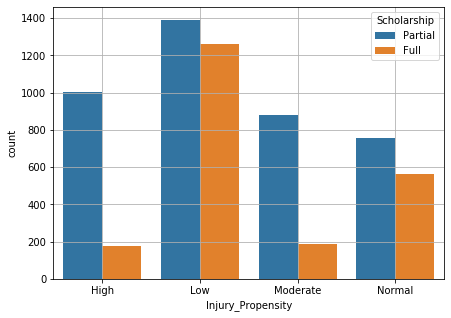

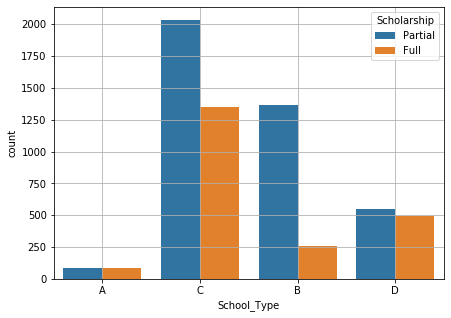

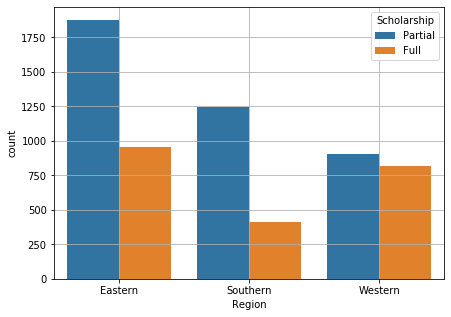

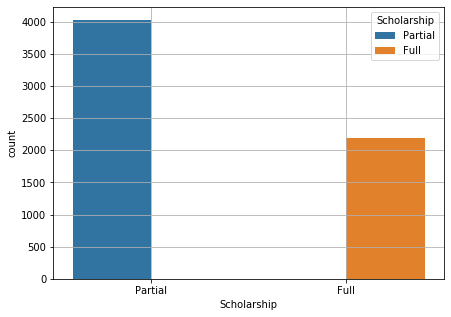

In [983]:
for i in df.columns: 
    if df[i].dtype == 'object': 
        plt.rcParams['figure.figsize'] = 7,5
        sns.countplot(x=df[i],hue =df['Scholarship'])
        plt.grid()
        plt.show();

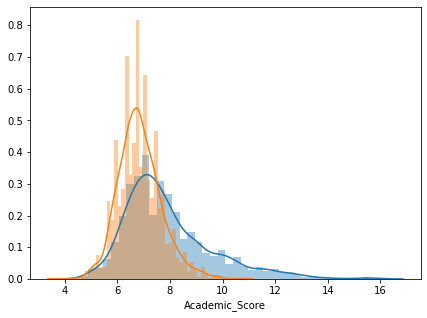

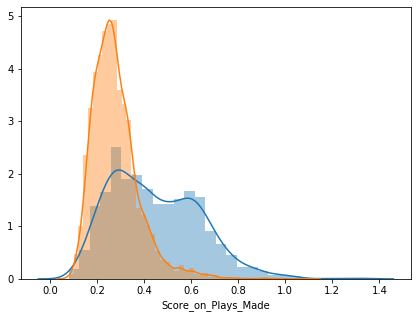

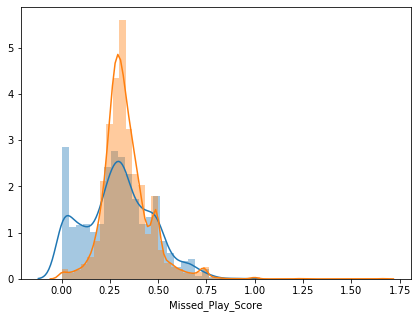

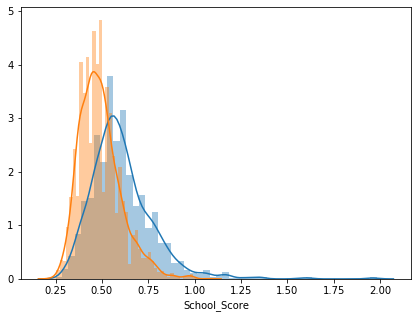

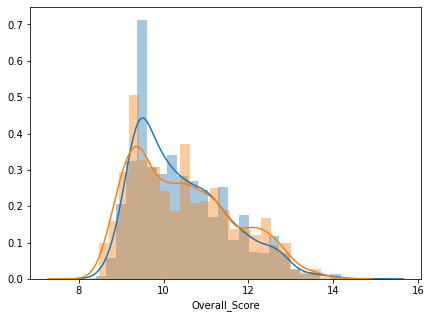

In [984]:
for i in (df.select_dtypes(['float64'])).columns:
    plt.rcParams['figure.figsize'] = 7,5
    sns.distplot(df[df['Scholarship'] == 'Full'][i])
    sns.distplot(df[df['Scholarship'] == 'Partial'][i])
    plt.show()
    

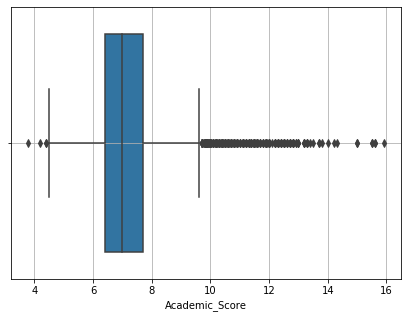

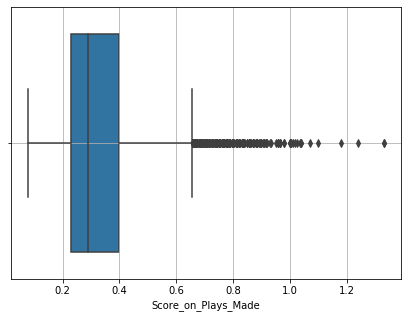

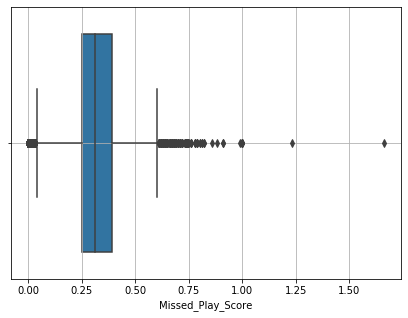

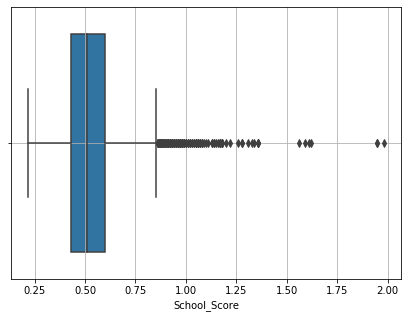

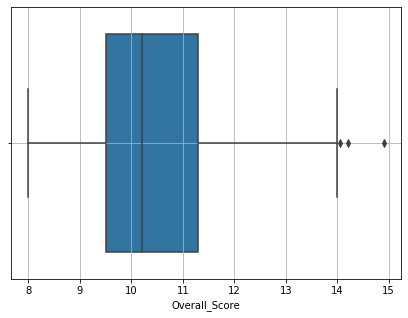

In [985]:
for i in df.columns: 
    if df[i].dtype == 'float64': 
        plt.rcParams['figure.figsize'] = 7,5
        sns.boxplot(df[i],whis=1.5)
        plt.grid()
        plt.show();

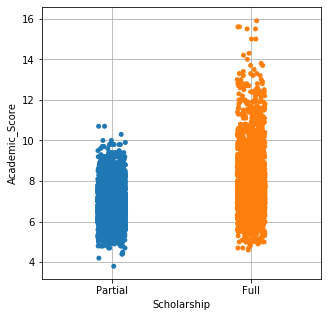

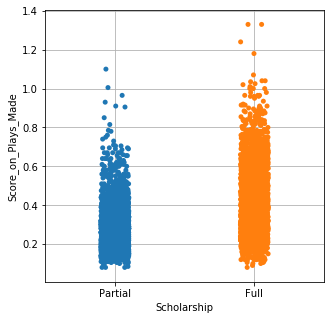

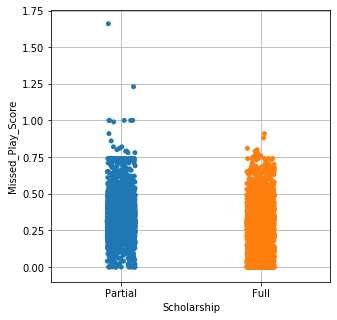

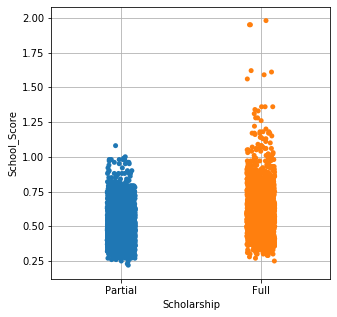

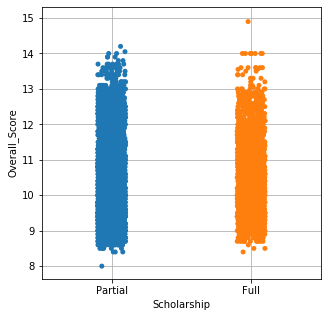

In [986]:
for i in df.columns: 
    if df[i].dtype == 'float64': 
        plt.matplotlib.rcParams['figure.figsize'] = 5,5
        sns.stripplot(x='Scholarship', y=i, data=df)
        plt.grid()
        plt.show();

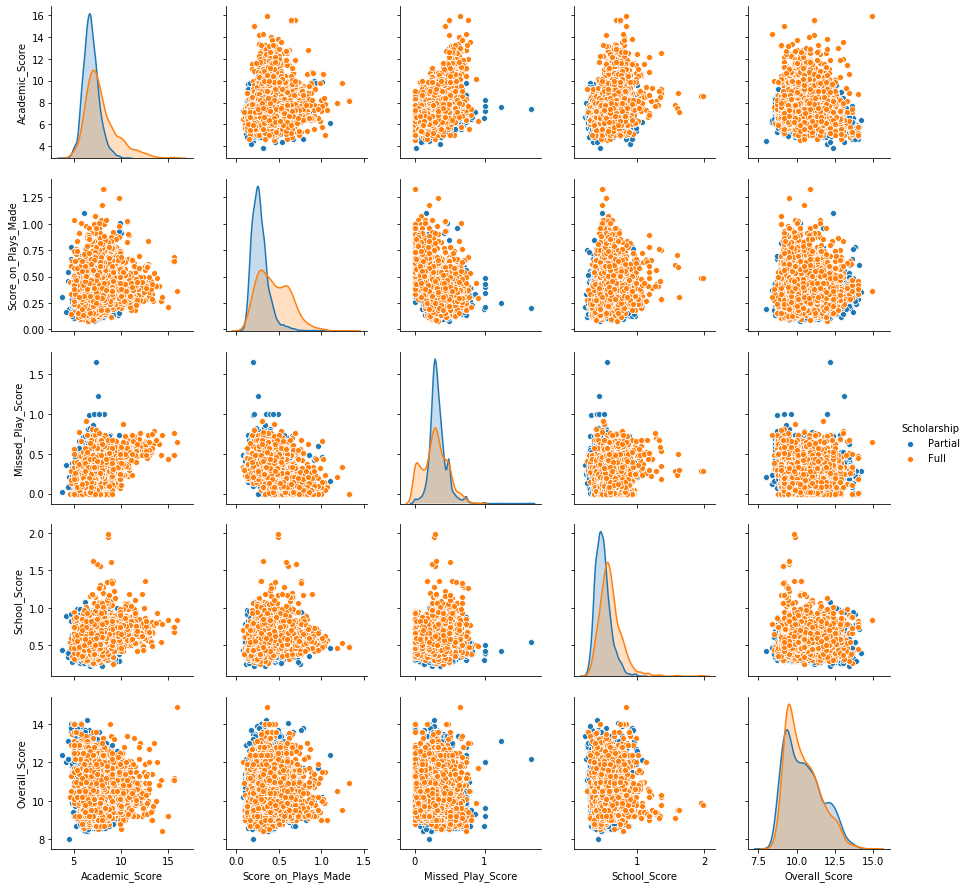

In [987]:
sns.pairplot(data=df,hue='Scholarship')

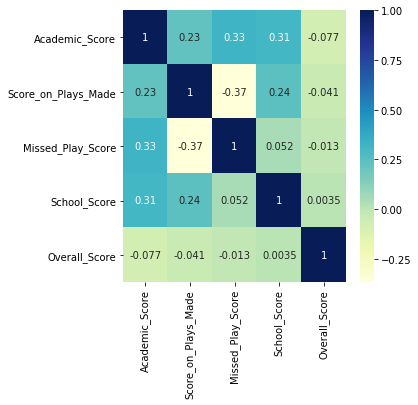

In [988]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

In [989]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
A=((df < (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).sum()
A

Academic_Score         336
Injury_Propensity        0
Missed_Play_Score      481
Overall_Score            3
Region                   0
Scholarship              0
School_Score           179
School_Type              0
Score_on_Plays_Made    339
dtype: int64

In [990]:
A.sum()

1338

In [991]:
df_copy = df.filter(['Scholarship'], axis=1)
df_copy.head()

,Scholarship
0,Partial
1,Partial
2,Partial
3,Partial
4,Partial


In [992]:
df=df.drop(['Scholarship'],axis=1)
df.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region
0,7.0,0.27,0.36,High,A,0.45,8.8,Eastern
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern


In [993]:
#df_copy = df.filter(['Scholarship'], axis=1)
#df_copy.head()

In [994]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0,0.27,0.36,0.45,8.8,0,0,0,0,0,0,0,0
1,6.3,0.30,0.34,0.49,9.5,1,0,0,0,1,0,0,0
2,8.1,0.28,0.40,0.44,10.1,0,1,0,0,1,0,0,0
3,7.2,0.23,0.32,0.40,9.9,0,1,0,0,1,0,0,0
4,7.2,0.23,0.32,0.40,9.9,0,1,0,0,1,0,0,0


In [995]:
from scipy.stats import zscore
df_scaled=df_dum.apply(zscore)
df_scaled.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,-0.169682,-0.420576,0.278787,-0.553191,-1.413133,-0.862171,-0.454748,-0.519041,-0.593765,-1.093315,-0.44881,-0.602692,-0.61958
1,-0.711422,-0.233203,0.140990,-0.281513,-0.816072,1.159863,-0.454748,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958
2,0.681624,-0.358118,0.554381,-0.621110,-0.304305,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958
3,-0.014899,-0.670405,0.003193,-0.892788,-0.474894,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958
4,-0.014899,-0.670405,0.003193,-0.892788,-0.474894,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958


In [996]:
def detect_outlier(data_1):
    outliers=[]
    threshold=3.0
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            
    return outliers

In [997]:
for i in df_scaled:
    print (i,':', len(detect_outlier(df_scaled[i])))

Academic_Score : 130
Score_on_Plays_Made : 82
Missed_Play_Score : 27
School_Score : 71
Overall_Score : 12
Injury_Propensity_Low : 0
Injury_Propensity_Moderate : 0
Injury_Propensity_Normal : 0
School_Type_B : 0
School_Type_C : 0
School_Type_D : 0
Region_Southern : 0
Region_Western : 0


In [998]:
# Capping the outliers to 3*std deviation on both extremities
for i in df_scaled:
    df_scaled[i] = np.where( df_scaled[i] > 3, 3 ,df_scaled[i])
    df_scaled[i] = np.where( df_scaled[i] < -3, -3 ,df_scaled[i])

In [999]:
for i in df_scaled:
    print (i, 'max value:', df_scaled[i].max())

Academic_Score max value: 3.0
Score_on_Plays_Made max value: 3.0
Missed_Play_Score max value: 3.0
School_Score max value: 3.0
Overall_Score max value: 3.0
Injury_Propensity_Low max value: 1.1598633621543206
Injury_Propensity_Moderate max value: 2.19901813343449
Injury_Propensity_Normal max value: 1.9266299480661677
School_Type_B max value: 1.68416737680268
School_Type_C max value: 0.9146496183511376
School_Type_D max value: 2.2281138576751225
Region_Southern max value: 1.6592225057753702
Region_Western max value: 1.6139976453117661


In [1000]:
for i in df_scaled:
    print (i, 'min value:', df_scaled[i].min())

Academic_Score min value: -2.64620767877444
Score_on_Plays_Made min value: -1.6072677463543277
Missed_Play_Score min value: -2.201561279818354
School_Score min value: -2.115337378744609
Overall_Score min value: -2.0954880280431385
Injury_Propensity_Low min value: -0.8621705216574893
Injury_Propensity_Moderate min value: -0.45474841011800615
Injury_Propensity_Normal min value: -0.5190410338029566
School_Type_B min value: -0.593765212278638
School_Type_C min value: -1.0933148387496465
School_Type_D min value: -0.44881009853034554
Region_Southern min value: -0.6026919213783752
Region_Western min value: -0.6195795904069216


In [1001]:
df_scaled.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,-0.169682,-0.420576,0.278787,-0.553191,-1.413133,-0.862171,-0.454748,-0.519041,-0.593765,-1.093315,-0.44881,-0.602692,-0.61958
1,-0.711422,-0.233203,0.140990,-0.281513,-0.816072,1.159863,-0.454748,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958
2,0.681624,-0.358118,0.554381,-0.621110,-0.304305,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958
3,-0.014899,-0.670405,0.003193,-0.892788,-0.474894,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958
4,-0.014899,-0.670405,0.003193,-0.892788,-0.474894,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958


In [1002]:
df_final=pd.concat([df_scaled,df_copy],axis=1)
df_final.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western,Scholarship
0,-0.169682,-0.420576,0.278787,-0.553191,-1.413133,-0.862171,-0.454748,-0.519041,-0.593765,-1.093315,-0.44881,-0.602692,-0.61958,Partial
1,-0.711422,-0.233203,0.140990,-0.281513,-0.816072,1.159863,-0.454748,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958,Partial
2,0.681624,-0.358118,0.554381,-0.621110,-0.304305,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958,Partial
3,-0.014899,-0.670405,0.003193,-0.892788,-0.474894,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958,Partial
4,-0.014899,-0.670405,0.003193,-0.892788,-0.474894,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958,Partial


In [1003]:
df_copy.head()

,Scholarship
0,Partial
1,Partial
2,Partial
3,Partial
4,Partial


In [1004]:
## Converting the 'scholarship' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [1005]:
## Applying the created Label Encoder object for the target class

df_final['Scholarship'] = LE.fit_transform(df_final['Scholarship'])
df_final.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western,Scholarship
0,-0.169682,-0.420576,0.278787,-0.553191,-1.413133,-0.862171,-0.454748,-0.519041,-0.593765,-1.093315,-0.44881,-0.602692,-0.61958,1
1,-0.711422,-0.233203,0.140990,-0.281513,-0.816072,1.159863,-0.454748,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958,1
2,0.681624,-0.358118,0.554381,-0.621110,-0.304305,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958,1
3,-0.014899,-0.670405,0.003193,-0.892788,-0.474894,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958,1
4,-0.014899,-0.670405,0.003193,-0.892788,-0.474894,-0.862171,2.199018,-0.519041,-0.593765,0.914650,-0.44881,-0.602692,-0.61958,1


In [1006]:
df_final.tail()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western,Scholarship
6210,-0.324465,1.765436,-1.650373,1.959828,-0.816072,1.159863,-0.454748,-0.519041,-0.593765,0.91465,-0.44881,-0.602692,-0.619580,0
6211,-0.788813,1.640521,-1.650373,0.329762,0.036872,1.159863,-0.454748,-0.519041,-0.593765,0.91465,-0.44881,-0.602692,1.613998,0
6212,-1.020988,1.328234,-1.512576,1.552311,0.633933,1.159863,-0.454748,-0.519041,-0.593765,0.91465,-0.44881,-0.602692,-0.619580,0
6213,-0.711422,1.078404,-1.305880,1.484392,0.463344,1.159863,-0.454748,-0.519041,-0.593765,0.91465,-0.44881,-0.602692,-0.619580,0
6214,-1.020988,1.921580,-1.374779,1.212714,-0.219011,1.159863,-0.454748,-0.519041,-0.593765,0.91465,-0.44881,-0.602692,1.613998,0


In [1007]:
import statsmodels.formula.api as sm

In [1008]:
df_final.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'School_Score', 'Overall_Score', 'Injury_Propensity_Low',
       'Injury_Propensity_Moderate', 'Injury_Propensity_Normal',
       'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern',
       'Region_Western', 'Scholarship'],
      dtype='object')

# 2.2 Build various iterations of the Logistic Regression model using appropriate variable selection techniques for the full data. Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable.

# Iteration 1 - all variables 

In [1009]:
formula_1='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+School_Type_B+School_Type_C+School_Type_D+Region_Southern+Region_Western'

In [1010]:
Logistic_1 = sm.logit(formula=formula_1,data=df_final).fit()

Optimization terminated successfully.
         Current function value: 0.412291
         Iterations 7


In [1011]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6201
Method:                           MLE   Df Model:                           13
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3643
Time:                        20:13:51   Log-Likelihood:                -2562.4
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7276      0.036     20.288      0.000       0.657       0.798
Academic_Score                -0.5839      0.053    -11.108      0.000      -0.687      -0.481
Score_on_Plays_Made           -0.8546      0.048    -17.870      0.000      -0.948      -0.761
Missed_Play_Score              0.2090      0.046      4.533      0.000       0.119       0.299
School_Score                  -0.4350      0.042    -10.314      0.000      -0.518      -0.352
Overall_Score                 -0.2572      0.051     -5.059      0.000      -0.357      -0.158
Injury_Propensity_Low         -0.9148      0.072    -12.637      0.000      -1.057      -0.773
Injury_Propensity_Moderate    -0.2358      0.057     -4.137      0.000      -0.348      -0.124
Injury_Propensity_Normal      -0.5334      0.061     -8.679      0.000      -0.654      -0.413
School_Type_B                  0.8678      0.145      5.978      0.000       0.583       1.152
School_Type_C                  0.3091      0.144      2.149      0.032       0.027       0.591
School_Type_D                 -0.1262      0.102     -1.242      0.214      -0.325       0.073
Region_Southern                0.1966      0.039      5.049      0.000       0.120       0.273
Region_Western                -0.0152      0.039     -0.386      0.699      -0.092       0.062
==============================================================================================
"""

In [1012]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [1013]:
vif_cal(input_data=df_final.drop('Scholarship',axis=1))

Academic_Score  VIF =  1.84
Score_on_Plays_Made  VIF =  1.59
Missed_Play_Score  VIF =  1.54
School_Score  VIF =  1.29
Overall_Score  VIF =  2.08
Injury_Propensity_Low  VIF =  3.58
Injury_Propensity_Moderate  VIF =  2.06
Injury_Propensity_Normal  VIF =  2.56
School_Type_B  VIF =  13.32
School_Type_C  VIF =  12.15
School_Type_D  VIF =  6.17
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.25


In [1014]:
model_1 = Logistic_1.predict(df_final.drop('Scholarship',axis=1))


In [1015]:
model_1=(model_1>=0.5).astype(np.int)
model_1

0       1
1       1
2       1
3       1
4       1
       ..
6210    0
6211    0
6212    0
6213    0
6214    0
Length: 6215, dtype: int32

In [1016]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

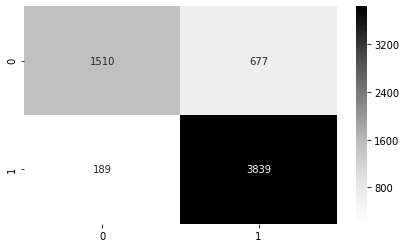

In [1017]:

#Plotting confusion matrix for the models

plot_0 = sns.heatmap((metrics.confusion_matrix(df_final['Scholarship'],model_1)),annot=True,fmt='.5g',cmap='Greys');



In [1018]:
print('Logistic_1')
tn, fp, fn, tp = metrics.confusion_matrix(df_final['Scholarship'],model_1).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic_1
True Negative: 1510 
False Positives: 677 
False Negatives: 189 
True Positives: 3839 




In [1019]:
print('Logistic_1')
print(metrics.classification_report(df_final['Scholarship'],model_1),'\n')


Logistic_1
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      2187
           1       0.85      0.95      0.90      4028

    accuracy                           0.86      6215
   macro avg       0.87      0.82      0.84      6215
weighted avg       0.86      0.86      0.86      6215
 



Logistic_1 AUC: 0.83320


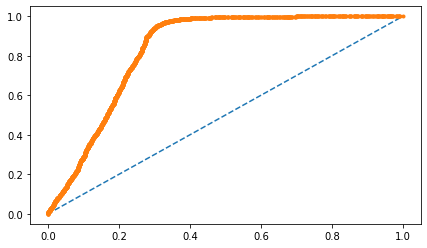

In [1020]:
# AUC and ROC for the model 1

# calculate AUC
auc = metrics.roc_auc_score(df_final['Scholarship'],Logistic_1.predict(df_final.drop('Scholarship',axis=1)))#keeping only the probabilities for the desired class outcome
print('Logistic_1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df_final['Scholarship'],Logistic_1.predict(df_final.drop('Scholarship',axis=1)))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()



# Iteration 2 - dropping 'School_Type_D'

In [1021]:
formula_2='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+School_Type_B+Region_Southern+Region_Western+School_Type_C'

In [1022]:
Logistic_2 = sm.logit(formula=formula_2,data=df_final).fit()

Optimization terminated successfully.
         Current function value: 0.412417
         Iterations 7


In [1023]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6202
Method:                           MLE   Df Model:                           12
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3642
Time:                        20:13:53   Log-Likelihood:                -2563.2
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7271      0.036     20.273      0.000       0.657       0.797
Academic_Score                -0.5751      0.052    -11.039      0.000      -0.677      -0.473
Score_on_Plays_Made           -0.8536      0.048    -17.843      0.000      -0.947      -0.760
Missed_Play_Score              0.2104      0.046      4.560      0.000       0.120       0.301
School_Score                  -0.4312      0.042    -10.257      0.000      -0.514      -0.349
Overall_Score                 -0.2613      0.051     -5.150      0.000      -0.361      -0.162
Injury_Propensity_Low         -0.9216      0.072    -12.745      0.000      -1.063      -0.780
Injury_Propensity_Moderate    -0.2402      0.057     -4.216      0.000      -0.352      -0.129
Injury_Propensity_Normal      -0.5376      0.061     -8.747      0.000      -0.658      -0.417
School_Type_B                  1.0093      0.090     11.193      0.000       0.833       1.186
Region_Southern                0.1965      0.039      5.047      0.000       0.120       0.273
Region_Western                -0.0156      0.039     -0.396      0.692      -0.093       0.062
School_Type_C                  0.4639      0.072      6.444      0.000       0.323       0.605
==============================================================================================
"""

In [1024]:
vif_cal(input_data=df_final.drop(['Scholarship','School_Type_D'],axis=1))

Academic_Score  VIF =  1.81
Score_on_Plays_Made  VIF =  1.59
Missed_Play_Score  VIF =  1.54
School_Score  VIF =  1.29
Overall_Score  VIF =  2.07
Injury_Propensity_Low  VIF =  3.56
Injury_Propensity_Moderate  VIF =  2.06
Injury_Propensity_Normal  VIF =  2.56
School_Type_B  VIF =  5.78
School_Type_C  VIF =  3.15
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.25


In [1025]:
model_2 = Logistic_2.predict(df_final.drop(['Scholarship','School_Type_D'],axis=1))


In [1026]:
model_2=(model_2>=0.5).astype(np.int)
model_2

0       1
1       1
2       1
3       1
4       1
       ..
6210    0
6211    0
6212    0
6213    0
6214    0
Length: 6215, dtype: int32

In [1027]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

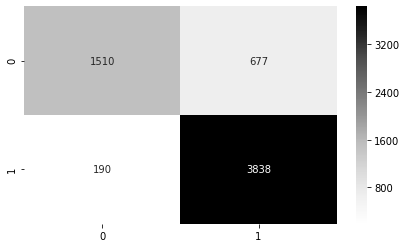

In [1028]:

#Plotting confusion matrix for the models

plot_0 = sns.heatmap((metrics.confusion_matrix(df_final['Scholarship'],model_2)),annot=True,fmt='.5g',cmap='Greys');



In [1029]:
print('Logistic_2')
tn, fp, fn, tp = metrics.confusion_matrix(df_final['Scholarship'],model_2).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic_2
True Negative: 1510 
False Positives: 677 
False Negatives: 190 
True Positives: 3838 




In [1030]:
print('Logistic_2')
print(metrics.classification_report(df_final['Scholarship'],model_2),'\n')


Logistic_2
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      2187
           1       0.85      0.95      0.90      4028

    accuracy                           0.86      6215
   macro avg       0.87      0.82      0.84      6215
weighted avg       0.86      0.86      0.86      6215
 



Logistic_2 AUC: 0.83293


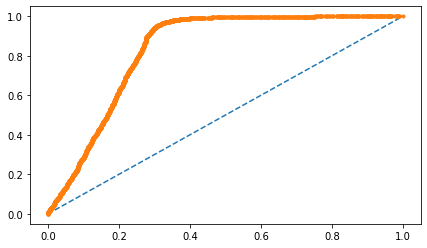

In [1031]:
# AUC and ROC for the model 2

# calculate AUC
auc = metrics.roc_auc_score(df_final['Scholarship'],Logistic_2.predict(df_final.drop(['Scholarship','School_Type_D'],axis=1)))#keeping only the probabilities for the desired class outcome
print('Logistic_2 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df_final['Scholarship'],Logistic_2.predict(df_final.drop(['Scholarship','School_Type_D'],axis=1)))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()



# Iteration 3 - dropping 'School_Type_B'

In [1032]:
formula_3='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+Region_Western+Region_Southern+School_Type_C'

In [1033]:
Logistic_3 = sm.logit(formula=formula_3,data=df_final).fit()

Optimization terminated successfully.
         Current function value: 0.423208
         Iterations 6


In [1034]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6203
Method:                           MLE   Df Model:                           11
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3475
Time:                        20:13:55   Log-Likelihood:                -2630.2
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7251      0.035     20.586      0.000       0.656       0.794
Academic_Score                -0.8050      0.047    -17.086      0.000      -0.897      -0.713
Score_on_Plays_Made           -0.9678      0.047    -20.696      0.000      -1.059      -0.876
Missed_Play_Score              0.1959      0.046      4.297      0.000       0.107       0.285
School_Score                  -0.5671      0.040    -14.184      0.000      -0.645      -0.489
Overall_Score                  0.0751      0.040      1.864      0.062      -0.004       0.154
Injury_Propensity_Low         -0.4812      0.055     -8.672      0.000      -0.590      -0.372
Injury_Propensity_Moderate    -0.0261      0.050     -0.519      0.604      -0.124       0.072
Injury_Propensity_Normal      -0.2483      0.052     -4.810      0.000      -0.349      -0.147
Region_Western                -0.0112      0.039     -0.290      0.772      -0.087       0.065
Region_Southern                0.2031      0.038      5.292      0.000       0.128       0.278
School_Type_C                 -0.1839      0.039     -4.699      0.000      -0.261      -0.107
==============================================================================================
"""

In [1035]:
vif_cal(input_data=df_final.drop(['Scholarship','School_Type_B','School_Type_D'],axis=1))

Academic_Score  VIF =  1.45
Score_on_Plays_Made  VIF =  1.51
Missed_Play_Score  VIF =  1.54
School_Score  VIF =  1.2
Overall_Score  VIF =  1.37
Injury_Propensity_Low  VIF =  2.42
Injury_Propensity_Moderate  VIF =  1.84
Injury_Propensity_Normal  VIF =  2.12
School_Type_C  VIF =  1.24
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.25


In [1036]:
model_3 = Logistic_3.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B'],axis=1))


In [1037]:
model_3=(model_3>=0.5).astype(np.int)
model_3

0       1
1       1
2       1
3       1
4       1
       ..
6210    0
6211    0
6212    0
6213    0
6214    0
Length: 6215, dtype: int32

In [1038]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

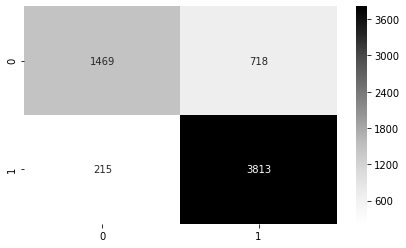

In [1039]:

#Plotting confusion matrix for the models

plot_0 = sns.heatmap((metrics.confusion_matrix(df_final['Scholarship'],model_3)),annot=True,fmt='.5g',cmap='Greys');



In [1040]:
print('Logistic_3')
tn, fp, fn, tp = metrics.confusion_matrix(df_final['Scholarship'],model_3).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic_3
True Negative: 1469 
False Positives: 718 
False Negatives: 215 
True Positives: 3813 




In [1041]:
print('Logistic_3')
print(metrics.classification_report(df_final['Scholarship'],model_3),'\n')


Logistic_3
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      2187
           1       0.84      0.95      0.89      4028

    accuracy                           0.85      6215
   macro avg       0.86      0.81      0.82      6215
weighted avg       0.85      0.85      0.84      6215
 



Logistic_3 AUC: 0.82991


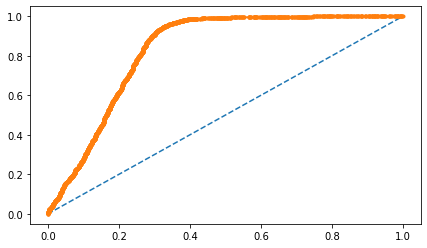

In [1042]:
# AUC and ROC for the model 3

# calculate AUC
auc = metrics.roc_auc_score(df_final['Scholarship'],Logistic_3.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B'],axis=1)))#keeping only the probabilities for the desired class outcome
print('Logistic_3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df_final['Scholarship'],Logistic_3.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B'],axis=1)))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()



# Iteration 4 - dropping 'Region_Western'

In [1043]:
formula_4='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+Region_Southern+School_Type_C'

In [1044]:
Logistic_4 = sm.logit(formula=formula_4,data=df_final).fit()

Optimization terminated successfully.
         Current function value: 0.423214
         Iterations 6


In [1045]:
Logistic_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6204
Method:                           MLE   Df Model:                           10
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3475
Time:                        20:13:56   Log-Likelihood:                -2630.3
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7251      0.035     20.589      0.000       0.656       0.794
Academic_Score                -0.8052      0.047    -17.090      0.000      -0.898      -0.713
Score_on_Plays_Made           -0.9700      0.046    -21.012      0.000      -1.060      -0.880
Missed_Play_Score              0.1963      0.046      4.307      0.000       0.107       0.286
School_Score                  -0.5671      0.040    -14.183      0.000      -0.645      -0.489
Overall_Score                  0.0753      0.040      1.868      0.062      -0.004       0.154
Injury_Propensity_Low         -0.4828      0.055     -8.738      0.000      -0.591      -0.374
Injury_Propensity_Moderate    -0.0267      0.050     -0.532      0.595      -0.125       0.072
Injury_Propensity_Normal      -0.2498      0.051     -4.863      0.000      -0.350      -0.149
Region_Southern                0.2070      0.036      5.755      0.000       0.136       0.277
School_Type_C                 -0.1826      0.039     -4.697      0.000      -0.259      -0.106
==============================================================================================
"""

In [1046]:
vif_cal(input_data=df_final.drop(['Scholarship','School_Type_B','School_Type_D','Region_Western'],axis=1))

Academic_Score  VIF =  1.45
Score_on_Plays_Made  VIF =  1.46
Missed_Play_Score  VIF =  1.53
School_Score  VIF =  1.2
Overall_Score  VIF =  1.37
Injury_Propensity_Low  VIF =  2.4
Injury_Propensity_Moderate  VIF =  1.84
Injury_Propensity_Normal  VIF =  2.1
School_Type_C  VIF =  1.23
Region_Southern  VIF =  1.09


In [1047]:
model_4 = Logistic_4.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B','Region_Western'],axis=1))


In [1048]:
model_4=(model_4>=0.5).astype(np.int)
model_4

0       1
1       1
2       1
3       1
4       1
       ..
6210    0
6211    0
6212    0
6213    0
6214    0
Length: 6215, dtype: int32

In [1049]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

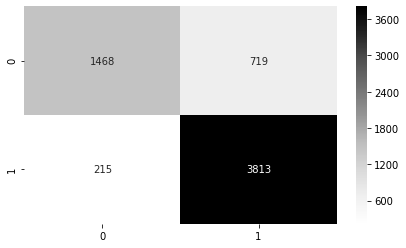

In [1050]:

#Plotting confusion matrix for the models

plot_0 = sns.heatmap((metrics.confusion_matrix(df_final['Scholarship'],model_4)),annot=True,fmt='.5g',cmap='Greys');



In [1051]:
print('Logistic_4')
tn, fp, fn, tp = metrics.confusion_matrix(df_final['Scholarship'],model_4).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic_4
True Negative: 1468 
False Positives: 719 
False Negatives: 215 
True Positives: 3813 




In [1052]:
print('Logistic_4')
print(metrics.classification_report(df_final['Scholarship'],model_4),'\n')


Logistic_4
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      2187
           1       0.84      0.95      0.89      4028

    accuracy                           0.85      6215
   macro avg       0.86      0.81      0.82      6215
weighted avg       0.85      0.85      0.84      6215
 



Logistic_4 AUC: 0.82995


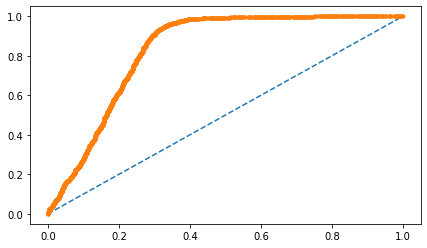

In [1053]:
# AUC and ROC for the model 4

# calculate AUC
auc = metrics.roc_auc_score(df_final['Scholarship'],Logistic_4.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B','Region_Western'],axis=1)))#keeping only the probabilities for the desired class outcome
print('Logistic_4 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df_final['Scholarship'],Logistic_4.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B','Region_Western'],axis=1)))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()



# Iteration 5 - dropping 'Injury_Propensity_Moderate'

In [1054]:
formula_5='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Normal+Region_Southern+School_Type_C'

In [1055]:
Logistic_5 = sm.logit(formula=formula_5,data=df_final).fit()

Optimization terminated successfully.
         Current function value: 0.423237
         Iterations 6


In [1056]:
Logistic_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6205
Method:                           MLE   Df Model:                            9
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3475
Time:                        20:13:57   Log-Likelihood:                -2630.4
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.7253      0.035     20.600      0.000       0.656       0.794
Academic_Score              -0.8055      0.047    -17.102      0.000      -0.898      -0.713
Score_on_Plays_Made         -0.9702      0.046    -21.021      0.000      -1.061      -0.880
Missed_Play_Score            0.1970      0.046      4.325      0.000       0.108       0.286
School_Score                -0.5662      0.040    -14.177      0.000      -0.644      -0.488
Overall_Score                0.0699      0.039      1.794      0.073      -0.006       0.146
Injury_Propensity_Low       -0.4642      0.043    -10.885      0.000      -0.548      -0.381
Injury_Propensity_Normal    -0.2342      0.042     -5.569      0.000      -0.317      -0.152
Region_Southern              0.2071      0.036      5.760      0.000       0.137       0.278
School_Type_C               -0.1887      0.037     -5.084      0.000      -0.261      -0.116
============================================================================================
"""

In [1057]:
vif_cal(input_data=df_final.drop(['Scholarship','School_Type_B','School_Type_D','Region_Western','Injury_Propensity_Moderate'],axis=1))

Academic_Score  VIF =  1.45
Score_on_Plays_Made  VIF =  1.46
Missed_Play_Score  VIF =  1.53
School_Score  VIF =  1.2
Overall_Score  VIF =  1.27
Injury_Propensity_Low  VIF =  1.55
Injury_Propensity_Normal  VIF =  1.51
School_Type_C  VIF =  1.1
Region_Southern  VIF =  1.09


In [1058]:
model_5 = Logistic_5.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B','Region_Western','Injury_Propensity_Moderate'],axis=1))


In [1059]:
model_5=(model_5>=0.5).astype(np.int)
model_5

0       1
1       1
2       1
3       1
4       1
       ..
6210    0
6211    0
6212    0
6213    0
6214    0
Length: 6215, dtype: int32

In [1060]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

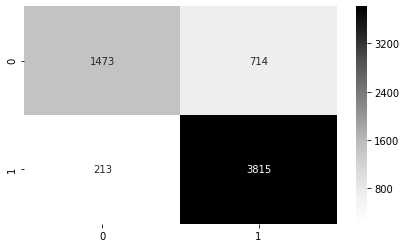

In [1061]:

#Plotting confusion matrix for the models

plot_0 = sns.heatmap((metrics.confusion_matrix(df_final['Scholarship'],model_5)),annot=True,fmt='.5g',cmap='Greys');



In [1062]:
print('Logistic_5')
tn, fp, fn, tp = metrics.confusion_matrix(df_final['Scholarship'],model_5).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic_5
True Negative: 1473 
False Positives: 714 
False Negatives: 213 
True Positives: 3815 




In [1063]:
print('Logistic_5')
print(metrics.classification_report(df_final['Scholarship'],model_5),'\n')


Logistic_5
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      2187
           1       0.84      0.95      0.89      4028

    accuracy                           0.85      6215
   macro avg       0.86      0.81      0.83      6215
weighted avg       0.85      0.85      0.85      6215
 



Logistic_5 AUC: 0.82992


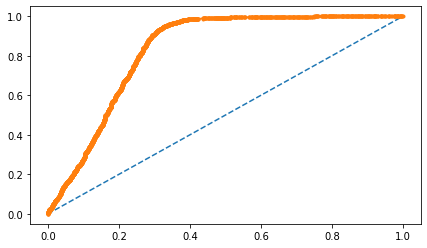

In [1064]:
# AUC and ROC for the model 5

# calculate AUC
auc = metrics.roc_auc_score(df_final['Scholarship'],Logistic_5.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B','Region_Western','Injury_Propensity_Moderate'],axis=1)))#keeping only the probabilities for the desired class outcome
print('Logistic_5 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df_final['Scholarship'],Logistic_5.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B','Region_Western','Injury_Propensity_Moderate'],axis=1)))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()



# Iteration 6 - dropping 'Overall_Score'

In [1065]:
formula_6='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Injury_Propensity_Low+Injury_Propensity_Normal+Region_Southern+School_Type_C'

In [1066]:
Logistic_6 = sm.logit(formula=formula_6,data=df_final).fit()

Optimization terminated successfully.
         Current function value: 0.423497
         Iterations 6


In [1067]:
Logistic_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6206
Method:                           MLE   Df Model:                            8
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3471
Time:                        20:13:58   Log-Likelihood:                -2632.0
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.7293      0.035     20.763      0.000       0.660       0.798
Academic_Score              -0.8160      0.047    -17.460      0.000      -0.908      -0.724
Score_on_Plays_Made         -0.9710      0.046    -21.057      0.000      -1.061      -0.881
Missed_Play_Score            0.2005      0.046      4.393      0.000       0.111       0.290
School_Score                -0.5652      0.040    -14.173      0.000      -0.643      -0.487
Injury_Propensity_Low       -0.4437      0.041    -10.806      0.000      -0.524      -0.363
Injury_Propensity_Normal    -0.2132      0.040     -5.280      0.000      -0.292      -0.134
Region_Southern              0.1973      0.036      5.533      0.000       0.127       0.267
School_Type_C               -0.2066      0.036     -5.776      0.000      -0.277      -0.137
============================================================================================
"""

In [1068]:
vif_cal(input_data=df_final.drop(['Scholarship','School_Type_B','School_Type_D','Region_Western','Injury_Propensity_Moderate','Overall_Score'],axis=1))

Academic_Score  VIF =  1.42
Score_on_Plays_Made  VIF =  1.46
Missed_Play_Score  VIF =  1.53
School_Score  VIF =  1.2
Injury_Propensity_Low  VIF =  1.41
Injury_Propensity_Normal  VIF =  1.38
School_Type_C  VIF =  1.06
Region_Southern  VIF =  1.05


In [1069]:
model_6 = Logistic_6.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B','Region_Western','Injury_Propensity_Moderate','Overall_Score'],axis=1))


In [1070]:
model_6=(model_6>=0.5).astype(np.int)
model_6

0       1
1       1
2       1
3       1
4       1
       ..
6210    0
6211    0
6212    0
6213    0
6214    0
Length: 6215, dtype: int32

In [1071]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

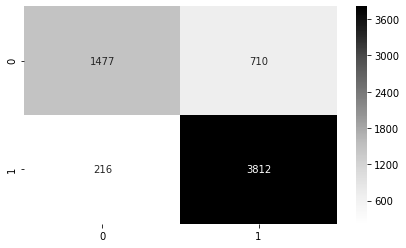

In [1072]:

#Plotting confusion matrix for the models

plot_0 = sns.heatmap((metrics.confusion_matrix(df_final['Scholarship'],model_6)),annot=True,fmt='.5g',cmap='Greys');



In [1073]:
print('Logistic_6')
tn, fp, fn, tp = metrics.confusion_matrix(df_final['Scholarship'],model_6).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic_6
True Negative: 1477 
False Positives: 710 
False Negatives: 216 
True Positives: 3812 




In [1074]:
print('Logistic_6')
print(metrics.classification_report(df_final['Scholarship'],model_6),'\n')


Logistic_6
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      2187
           1       0.84      0.95      0.89      4028

    accuracy                           0.85      6215
   macro avg       0.86      0.81      0.83      6215
weighted avg       0.85      0.85      0.85      6215
 



Logistic_6 AUC: 0.83037


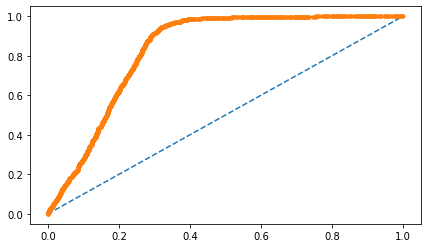

In [1075]:
# AUC and ROC for the model 6

# calculate AUC
auc = metrics.roc_auc_score(df_final['Scholarship'],Logistic_6.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B','Region_Western','Injury_Propensity_Moderate','Overall_Score'],axis=1)))#keeping only the probabilities for the desired class outcome
print('Logistic_6 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df_final['Scholarship'],Logistic_6.predict(df_final.drop(['Scholarship','School_Type_D','School_Type_B','Region_Western','Injury_Propensity_Moderate','Overall_Score'],axis=1)))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()



# 2.3 Split the data into training (70%) and test (30%). Build the various iterations of the Logistic Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.

In [1076]:
from sklearn.model_selection import train_test_split

In [1077]:
Train,Test = train_test_split(df_final,test_size=0.3,random_state=1,stratify=df_final['Scholarship'])

In [1078]:
Train.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western,Scholarship
4091,-1.562728,-0.170746,-0.823590,-0.553191,2.169232,1.159863,-0.454748,-0.519041,1.684167,-1.093315,-0.448810,-0.602692,1.613998,1
3592,0.139884,-0.420576,-0.065706,0.805198,1.316288,1.159863,-0.454748,-0.519041,1.684167,-1.093315,-0.448810,-0.602692,1.613998,1
6076,-0.247074,1.515606,-2.132663,1.348553,-0.645483,1.159863,-0.454748,-0.519041,-0.593765,0.914650,-0.448810,-0.602692,1.613998,0
1146,-1.717511,-0.045831,-1.099184,-0.621110,0.207461,1.159863,-0.454748,-0.519041,1.684167,-1.093315,-0.448810,-0.602692,-0.619580,1
5410,0.062492,1.078404,-0.961387,1.348553,-0.816072,1.159863,-0.454748,-0.519041,-0.593765,-1.093315,2.228114,-0.602692,-0.619580,0


In [1079]:
X_train= Train.drop('Scholarship',axis=1)

In [1080]:
X_test= Test.drop('Scholarship',axis=1)

In [1081]:
y_train = Train['Scholarship']

In [1082]:
y_test = Test['Scholarship']

In [1083]:
Train.shape

(4350, 14)

In [1084]:
Test.shape

(1865, 14)

# Iteration 1 - all variables

In [1085]:
formula2_1='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+School_Type_B+School_Type_C+School_Type_D+Region_Southern+Region_Western'

In [1086]:
Logistic2_1 = sm.logit(formula=formula2_1,data=Train).fit()

Optimization terminated successfully.
         Current function value: 0.419095
         Iterations 6


In [1087]:
result1 = Logistic2_1.summary()
result1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 4350
Model:                          Logit   Df Residuals:                     4336
Method:                           MLE   Df Model:                           13
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3539
Time:                        20:14:00   Log-Likelihood:                -1823.1
converged:                       True   LL-Null:                       -2821.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7212      0.042     17.025      0.000       0.638       0.804
Academic_Score                -0.6313      0.063    -10.083      0.000      -0.754      -0.509
Score_on_Plays_Made           -0.8359      0.056    -14.806      0.000      -0.947      -0.725
Missed_Play_Score              0.1705      0.055      3.124      0.002       0.064       0.278
School_Score                  -0.4120      0.050     -8.299      0.000      -0.509      -0.315
Overall_Score                 -0.2171      0.060     -3.626      0.000      -0.335      -0.100
Injury_Propensity_Low         -0.8186      0.084     -9.719      0.000      -0.984      -0.654
Injury_Propensity_Moderate    -0.2129      0.066     -3.238      0.001      -0.342      -0.084
Injury_Propensity_Normal      -0.4797      0.071     -6.710      0.000      -0.620      -0.340
School_Type_B                  0.6732      0.171      3.936      0.000       0.338       1.008
School_Type_C                  0.1159      0.170      0.682      0.495      -0.217       0.449
School_Type_D                 -0.2228      0.121     -1.849      0.064      -0.459       0.013
Region_Southern                0.2326      0.046      5.028      0.000       0.142       0.323
Region_Western                -0.0073      0.047     -0.157      0.876      -0.099       0.084
==============================================================================================
"""

In [1088]:
from sklearn import metrics

In [1089]:
model_1_train_class = Logistic2_1.predict(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
model_1_test_class = Logistic2_1.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']])

In [1090]:
model_1_train_class = Logistic2_1.predict(X_train)
model_1_test_class = Logistic2_1.predict(X_test)

In [1091]:
model_1_train_class=(model_1_train_class>=0.5).astype(np.int)
model_1_train_class

4091    1
3592    1
6076    0
1146    1
5410    0
       ..
1853    1
4631    1
4301    1
3584    1
2619    1
Length: 4350, dtype: int32

In [1092]:
model_1_test_class=(model_1_test_class>=0.5).astype(np.int)
model_1_test_class

5305    0
1641    1
4157    1
4016    1
1582    0
       ..
1102    1
1986    0
1074    1
5844    0
1012    1
Length: 1865, dtype: int32

In [1093]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

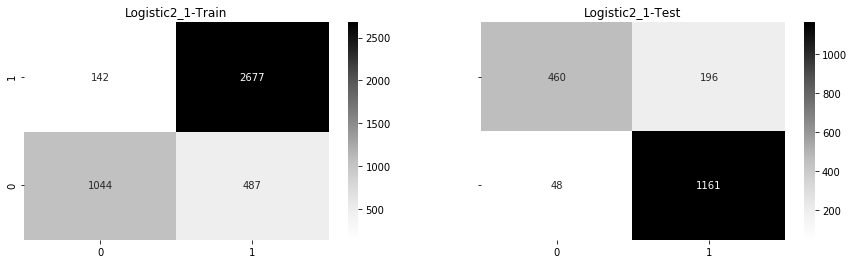

In [1094]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,model_1_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Logistic2_1-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,model_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Logistic2_1-Test');



In [1095]:
print('Logistic2_1-Train')
tn, fp, fn, tp = metrics.confusion_matrix(y_train,model_1_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Logistic2_1-Test')
tn, fp, fn, tp = metrics.confusion_matrix(y_test,model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic2_1-Train
True Negative: 1044 
False Positives: 487 
False Negatives: 142 
True Positives: 2677 


Logistic2_1-Test
True Negative: 460 
False Positives: 196 
False Negatives: 48 
True Positives: 1161 




In [1096]:
print('Logistic2_1-Train')
print(metrics.classification_report(y_train,model_1_train_class),'\n')

print('Logistic2_1-Test')
print(metrics.classification_report(y_test,model_1_test_class),'\n')

Logistic2_1-Train
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1531
           1       0.85      0.95      0.89      2819

    accuracy                           0.86      4350
   macro avg       0.86      0.82      0.83      4350
weighted avg       0.86      0.86      0.85      4350
 

Logistic2_1-Test
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       656
           1       0.86      0.96      0.90      1209

    accuracy                           0.87      1865
   macro avg       0.88      0.83      0.85      1865
weighted avg       0.87      0.87      0.86      1865
 



In [1097]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

Logistic2_1-Train AUC: 0.82775


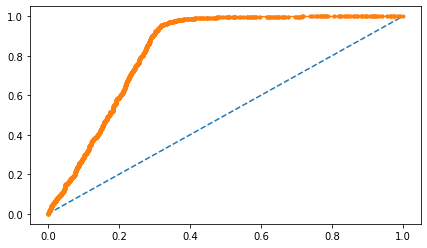

Logistic2_1-Test AUC: 0.84612


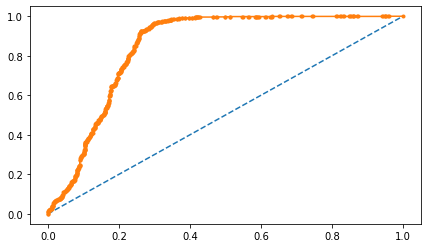

In [1098]:
# AUC and ROC for the model 1

# calculate AUC
auc = metrics.roc_auc_score(y_train,Logistic2_1.predict(X_train))#keeping only the probabilities for the desired class outcome
print('Logistic2_1-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Logistic2_1.predict(X_train))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(y_test,Logistic2_1.predict(X_test))#keeping only the probabilities for the desired class outcome
print('Logistic2_1-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Logistic2_1.predict(X_test))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Iteration 2 - dropping 'School_Type_D'

In [1099]:
formula2_2='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+School_Type_B+School_Type_C+Region_Southern+Region_Western'

In [1100]:
Logistic2_2 = sm.logit(formula=formula2_2,data=Train).fit()

Optimization terminated successfully.
         Current function value: 0.419497
         Iterations 6


In [1101]:
result1 = Logistic2_2.summary()
result1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 4350
Model:                          Logit   Df Residuals:                     4337
Method:                           MLE   Df Model:                           12
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3533
Time:                        20:14:02   Log-Likelihood:                -1824.8
converged:                       True   LL-Null:                       -2821.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7199      0.042     17.001      0.000       0.637       0.803
Academic_Score                -0.6131      0.062     -9.917      0.000      -0.734      -0.492
Score_on_Plays_Made           -0.8343      0.056    -14.772      0.000      -0.945      -0.724
Missed_Play_Score              0.1717      0.055      3.139      0.002       0.064       0.279
School_Score                  -0.4051      0.049     -8.195      0.000      -0.502      -0.308
Overall_Score                 -0.2240      0.060     -3.748      0.000      -0.341      -0.107
Injury_Propensity_Low         -0.8311      0.084     -9.872      0.000      -0.996      -0.666
Injury_Propensity_Moderate    -0.2207      0.066     -3.356      0.001      -0.350      -0.092
Injury_Propensity_Normal      -0.4875      0.072     -6.813      0.000      -0.628      -0.347
School_Type_B                  0.9237      0.105      8.798      0.000       0.718       1.129
School_Type_C                  0.3902      0.083      4.684      0.000       0.227       0.553
Region_Southern                0.2317      0.046      5.012      0.000       0.141       0.322
Region_Western                -0.0077      0.047     -0.164      0.870      -0.099       0.084
==============================================================================================
"""

In [1102]:
from sklearn import metrics

In [1103]:
X_train2 =X_train.drop('School_Type_D',axis=1)
X_test2 = X_test.drop('School_Type_D',axis=1)

In [1104]:
model_2_train_class = Logistic2_2.predict(X_train2)
model_2_test_class = Logistic2_2.predict(X_test2)

In [1105]:
model_2_train_class=(model_2_train_class>=0.5).astype(np.int)
model_2_train_class

4091    1
3592    1
6076    0
1146    1
5410    0
       ..
1853    1
4631    1
4301    1
3584    1
2619    1
Length: 4350, dtype: int32

In [1106]:
model_2_test_class=(model_2_test_class>=0.5).astype(np.int)
model_2_test_class

5305    0
1641    1
4157    1
4016    1
1582    0
       ..
1102    1
1986    0
1074    1
5844    0
1012    1
Length: 1865, dtype: int32

In [1107]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

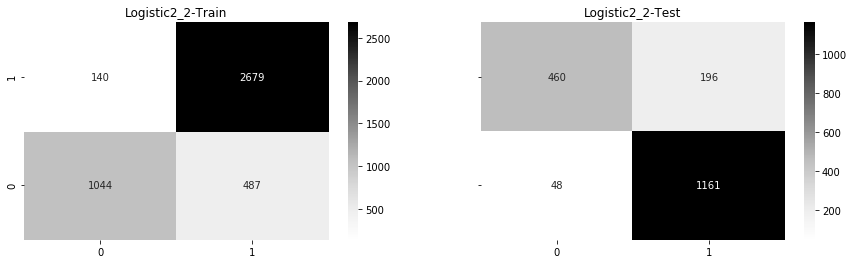

In [1108]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,model_2_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Logistic2_2-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,model_2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Logistic2_2-Test');



In [1109]:
print('Logistic2_2-Train')
tn, fp, fn, tp = metrics.confusion_matrix(y_train,model_2_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Logistic2_2-Test')
tn, fp, fn, tp = metrics.confusion_matrix(y_test,model_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic2_2-Train
True Negative: 1044 
False Positives: 487 
False Negatives: 140 
True Positives: 2679 


Logistic2_2-Test
True Negative: 460 
False Positives: 196 
False Negatives: 48 
True Positives: 1161 




In [1110]:
print('Logistic2_2-Train')
print(metrics.classification_report(y_train,model_2_train_class),'\n')

print('Logistic2_2-Test')
print(metrics.classification_report(y_test,model_2_test_class),'\n')

Logistic2_2-Train
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1531
           1       0.85      0.95      0.90      2819

    accuracy                           0.86      4350
   macro avg       0.86      0.82      0.83      4350
weighted avg       0.86      0.86      0.85      4350
 

Logistic2_2-Test
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       656
           1       0.86      0.96      0.90      1209

    accuracy                           0.87      1865
   macro avg       0.88      0.83      0.85      1865
weighted avg       0.87      0.87      0.86      1865
 



In [1111]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

Logistic2_2-Train AUC: 0.82706


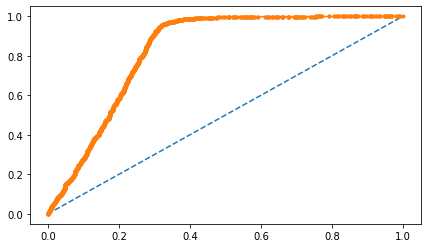

Logistic2_2-Test AUC: 0.84612


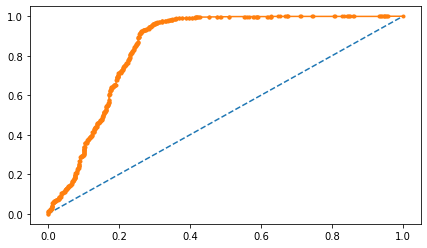

In [1112]:
# AUC and ROC for the model 2

# calculate AUC
auc = metrics.roc_auc_score(y_train,Logistic2_2.predict(X_train2))#keeping only the probabilities for the desired class outcome
print('Logistic2_2-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Logistic2_2.predict(X_train2))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(y_test,Logistic2_2.predict(X_test2))#keeping only the probabilities for the desired class outcome
print('Logistic2_2-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Logistic2_2.predict(X_test2))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Iteration 3 - dropping 'School_Type_B'

In [1113]:
formula2_3='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+School_Type_C+Region_Southern+Region_Western'

In [1114]:
Logistic2_3 = sm.logit(formula=formula2_3,data=Train).fit()

Optimization terminated successfully.
         Current function value: 0.428934
         Iterations 6


In [1115]:
result1 = Logistic2_3.summary()
result1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 4350
Model:                          Logit   Df Residuals:                     4338
Method:                           MLE   Df Model:                           11
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3387
Time:                        20:14:04   Log-Likelihood:                -1865.9
converged:                       True   LL-Null:                       -2821.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7149      0.042     17.167      0.000       0.633       0.797
Academic_Score                -0.8246      0.056    -14.672      0.000      -0.935      -0.714
Score_on_Plays_Made           -0.9428      0.055    -17.110      0.000      -1.051      -0.835
Missed_Play_Score              0.1537      0.054      2.842      0.004       0.048       0.260
School_Score                  -0.5304      0.047    -11.309      0.000      -0.622      -0.438
Overall_Score                  0.0877      0.048      1.840      0.066      -0.006       0.181
Injury_Propensity_Low         -0.4312      0.066     -6.554      0.000      -0.560      -0.302
Injury_Propensity_Moderate    -0.0340      0.059     -0.577      0.564      -0.149       0.081
Injury_Propensity_Normal      -0.2295      0.061     -3.751      0.000      -0.349      -0.110
School_Type_C                 -0.1968      0.046     -4.241      0.000      -0.288      -0.106
Region_Southern                0.2403      0.046      5.260      0.000       0.151       0.330
Region_Western                 0.0017      0.046      0.036      0.971      -0.089       0.092
==============================================================================================
"""

In [1116]:
from sklearn import metrics

In [1117]:
X_train3=X_train2.drop('School_Type_B',axis=1)
X_test3=X_test2.drop('School_Type_B',axis=1)

In [1118]:
model_3_train_class = Logistic2_3.predict(X_train3)
model_3_test_class = Logistic2_3.predict(X_test3)

In [1119]:
model_3_train_class=(model_3_train_class>=0.5).astype(np.int)
model_3_train_class

4091    1
3592    1
6076    0
1146    1
5410    0
       ..
1853    1
4631    1
4301    1
3584    1
2619    1
Length: 4350, dtype: int32

In [1120]:
model_3_test_class=(model_3_test_class>=0.5).astype(np.int)
model_3_test_class

5305    0
1641    1
4157    1
4016    1
1582    1
       ..
1102    1
1986    0
1074    1
5844    0
1012    1
Length: 1865, dtype: int32

In [1121]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

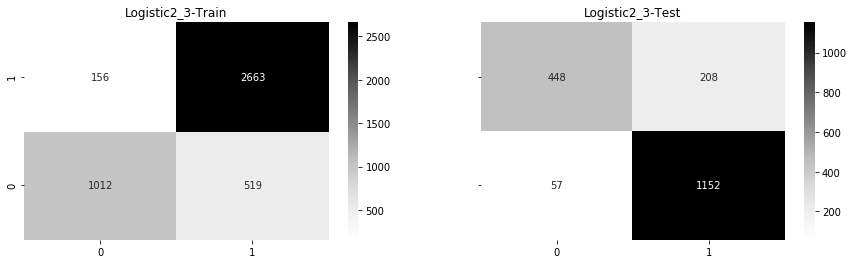

In [1122]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,model_3_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Logistic2_3-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,model_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Logistic2_3-Test');



In [1123]:
print('Logistic2_3-Train')
tn, fp, fn, tp = metrics.confusion_matrix(y_train,model_3_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Logistic2_3-Test')
tn, fp, fn, tp = metrics.confusion_matrix(y_test,model_3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic2_3-Train
True Negative: 1012 
False Positives: 519 
False Negatives: 156 
True Positives: 2663 


Logistic2_3-Test
True Negative: 448 
False Positives: 208 
False Negatives: 57 
True Positives: 1152 




In [1124]:
print('Logistic2_3-Train')
print(metrics.classification_report(y_train,model_3_train_class),'\n')

print('Logistic2_3-Test')
print(metrics.classification_report(y_test,model_3_test_class),'\n')

Logistic2_3-Train
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1531
           1       0.84      0.94      0.89      2819

    accuracy                           0.84      4350
   macro avg       0.85      0.80      0.82      4350
weighted avg       0.85      0.84      0.84      4350
 

Logistic2_3-Test
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       656
           1       0.85      0.95      0.90      1209

    accuracy                           0.86      1865
   macro avg       0.87      0.82      0.83      1865
weighted avg       0.86      0.86      0.85      1865
 



Logistic2_3-Train AUC: 0.82541


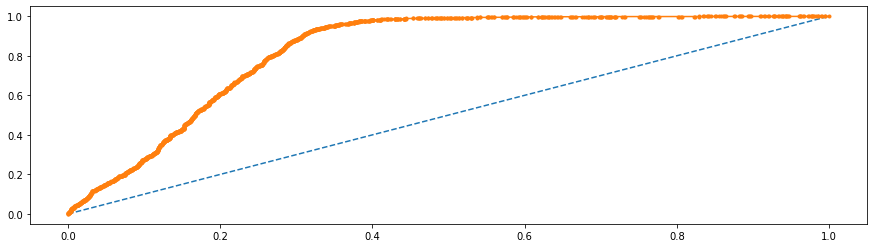

Logistic2_3-Test AUC: 0.83966


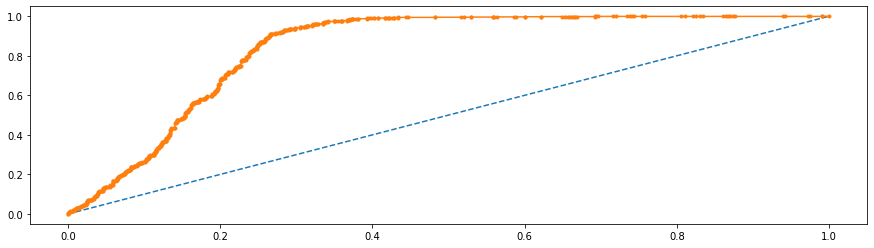

In [1125]:
# AUC and ROC for the model 3

# calculate AUC
auc = metrics.roc_auc_score(y_train,Logistic2_3.predict(X_train3))#keeping only the probabilities for the desired class outcome
print('Logistic2_3-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Logistic2_3.predict(X_train3))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(y_test,Logistic2_3.predict(X_test3))#keeping only the probabilities for the desired class outcome
print('Logistic2_3-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Logistic2_3.predict(X_test3))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Iteration 4 - dropping 'Region_Western'

In [1126]:
formula2_4='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+School_Type_C+Region_Southern'

In [1127]:
Logistic2_4 = sm.logit(formula=formula2_4,data=Train).fit()

Optimization terminated successfully.
         Current function value: 0.428934
         Iterations 6


In [1128]:
result1 = Logistic2_4.summary()
result1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 4350
Model:                          Logit   Df Residuals:                     4339
Method:                           MLE   Df Model:                           10
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3387
Time:                        20:14:06   Log-Likelihood:                -1865.9
converged:                       True   LL-Null:                       -2821.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7149      0.042     17.168      0.000       0.633       0.796
Academic_Score                -0.8246      0.056    -14.675      0.000      -0.935      -0.714
Score_on_Plays_Made           -0.9424      0.054    -17.340      0.000      -1.049      -0.836
Missed_Play_Score              0.1537      0.054      2.842      0.004       0.048       0.260
School_Score                  -0.5304      0.047    -11.309      0.000      -0.622      -0.438
Overall_Score                  0.0877      0.048      1.840      0.066      -0.006       0.181
Injury_Propensity_Low         -0.4309      0.065     -6.585      0.000      -0.559      -0.303
Injury_Propensity_Moderate    -0.0339      0.059     -0.576      0.564      -0.149       0.081
Injury_Propensity_Normal      -0.2292      0.061     -3.769      0.000      -0.348      -0.110
School_Type_C                 -0.1970      0.046     -4.276      0.000      -0.287      -0.107
Region_Southern                0.2397      0.043      5.586      0.000       0.156       0.324
==============================================================================================
"""

In [1129]:
from sklearn import metrics

In [1130]:
X_train4=X_train3.drop('Region_Western',axis=1)
X_test4=X_test3.drop('Region_Western',axis=1)

In [1131]:
model_4_train_class = Logistic2_4.predict(X_train4)
model_4_test_class = Logistic2_4.predict(X_test4)

In [1132]:
model_4_train_class=(model_4_train_class>=0.5).astype(np.int)
model_4_train_class

4091    1
3592    1
6076    0
1146    1
5410    0
       ..
1853    1
4631    1
4301    1
3584    1
2619    1
Length: 4350, dtype: int32

In [1133]:
model_4_test_class=(model_4_test_class>=0.5).astype(np.int)
model_4_test_class

5305    0
1641    1
4157    1
4016    1
1582    1
       ..
1102    1
1986    0
1074    1
5844    0
1012    1
Length: 1865, dtype: int32

In [1134]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

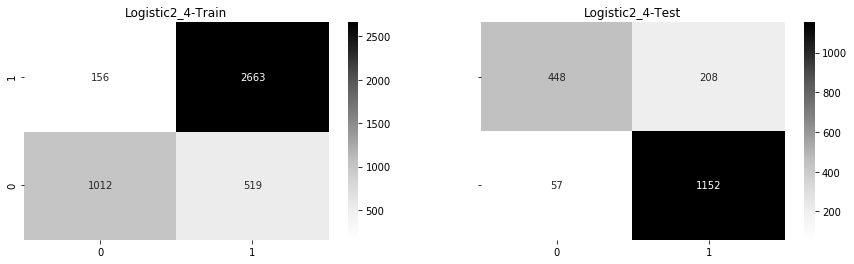

In [1135]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,model_4_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Logistic2_4-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,model_4_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Logistic2_4-Test');



In [1136]:
print('Logistic2_4-Train')
tn, fp, fn, tp = metrics.confusion_matrix(y_train,model_4_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Logistic2_4-Test')
tn, fp, fn, tp = metrics.confusion_matrix(y_test,model_4_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic2_4-Train
True Negative: 1012 
False Positives: 519 
False Negatives: 156 
True Positives: 2663 


Logistic2_4-Test
True Negative: 448 
False Positives: 208 
False Negatives: 57 
True Positives: 1152 




In [1137]:
print('Logistic2_4-Train')
print(metrics.classification_report(y_train,model_4_train_class),'\n')

print('Logistic2_4-Test')
print(metrics.classification_report(y_test,model_4_test_class),'\n')

Logistic2_4-Train
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1531
           1       0.84      0.94      0.89      2819

    accuracy                           0.84      4350
   macro avg       0.85      0.80      0.82      4350
weighted avg       0.85      0.84      0.84      4350
 

Logistic2_4-Test
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       656
           1       0.85      0.95      0.90      1209

    accuracy                           0.86      1865
   macro avg       0.87      0.82      0.83      1865
weighted avg       0.86      0.86      0.85      1865
 



In [1138]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

Logistic2_4-Train AUC: 0.82540


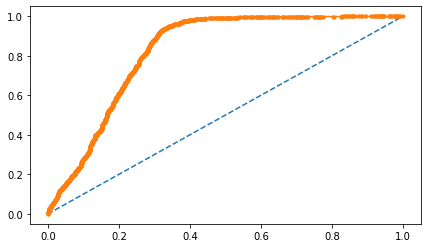

Logistic2_4-Test AUC: 0.83967


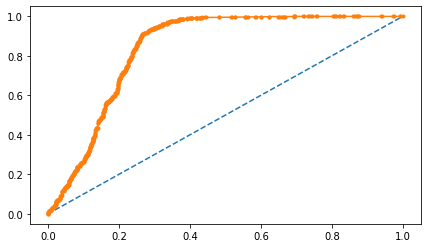

In [1139]:
# AUC and ROC for the model 4

# calculate AUC
auc = metrics.roc_auc_score(y_train,Logistic2_4.predict(X_train4))#keeping only the probabilities for the desired class outcome
print('Logistic2_4-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Logistic2_4.predict(X_train4))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(y_test,Logistic2_4.predict(X_test4))#keeping only the probabilities for the desired class outcome
print('Logistic2_4-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Logistic2_4.predict(X_test4))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Iteration 5 - dropping 'Injury_Propensity_Moderate'

In [1140]:
formula2_5='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Normal+School_Type_C+Region_Southern'

In [1141]:
Logistic2_5 = sm.logit(formula=formula2_5,data=Train).fit()

Optimization terminated successfully.
         Current function value: 0.428972
         Iterations 6


In [1142]:
result1 = Logistic2_5.summary()
result1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 4350
Model:                          Logit   Df Residuals:                     4340
Method:                           MLE   Df Model:                            9
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3387
Time:                        20:14:08   Log-Likelihood:                -1866.0
converged:                       True   LL-Null:                       -2821.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.7149      0.042     17.175      0.000       0.633       0.796
Academic_Score              -0.8248      0.056    -14.687      0.000      -0.935      -0.715
Score_on_Plays_Made         -0.9424      0.054    -17.342      0.000      -1.049      -0.836
Missed_Play_Score            0.1547      0.054      2.863      0.004       0.049       0.261
School_Score                -0.5289      0.047    -11.298      0.000      -0.621      -0.437
Overall_Score                0.0807      0.046      1.752      0.080      -0.010       0.171
Injury_Propensity_Low       -0.4072      0.051     -8.062      0.000      -0.506      -0.308
Injury_Propensity_Normal    -0.2092      0.050     -4.207      0.000      -0.307      -0.112
School_Type_C               -0.2050      0.044     -4.674      0.000      -0.291      -0.119
Region_Southern              0.2400      0.043      5.594      0.000       0.156       0.324
============================================================================================
"""

In [1143]:
from sklearn import metrics

In [1144]:
X_train5=X_train4.drop('Injury_Propensity_Moderate',axis=1)
X_test5=X_test4.drop('Injury_Propensity_Moderate',axis=1)

In [1145]:
model_5_train_class = Logistic2_5.predict(X_train5)
model_5_test_class = Logistic2_5.predict(X_test5)

In [1146]:
model_5_train_class=(model_5_train_class>=0.5).astype(np.int)
model_5_train_class

4091    1
3592    1
6076    0
1146    1
5410    0
       ..
1853    1
4631    1
4301    1
3584    1
2619    1
Length: 4350, dtype: int32

In [1147]:
model_5_test_class=(model_5_test_class>=0.5).astype(np.int)
model_5_test_class

5305    0
1641    1
4157    1
4016    1
1582    1
       ..
1102    1
1986    0
1074    1
5844    0
1012    1
Length: 1865, dtype: int32

In [1148]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

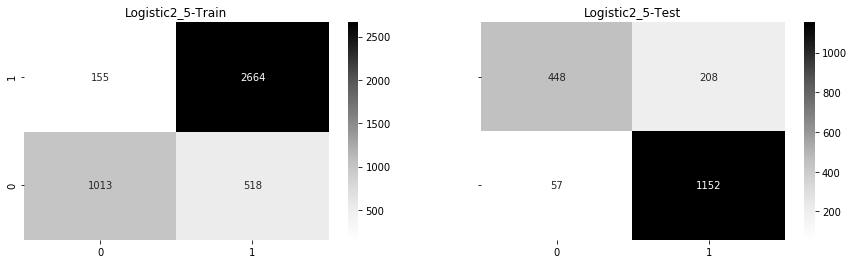

In [1149]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,model_5_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Logistic2_5-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,model_5_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Logistic2_5-Test');



In [1150]:
print('Logistic2_5-Train')
tn, fp, fn, tp = metrics.confusion_matrix(y_train,model_5_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Logistic2_5-Test')
tn, fp, fn, tp = metrics.confusion_matrix(y_test,model_5_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic2_5-Train
True Negative: 1013 
False Positives: 518 
False Negatives: 155 
True Positives: 2664 


Logistic2_5-Test
True Negative: 448 
False Positives: 208 
False Negatives: 57 
True Positives: 1152 




In [1151]:
print('Logistic2_5-Train')
print(metrics.classification_report(y_train,model_5_train_class),'\n')

print('Logistic2_5-Test')
print(metrics.classification_report(y_test,model_5_test_class),'\n')

Logistic2_5-Train
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1531
           1       0.84      0.95      0.89      2819

    accuracy                           0.85      4350
   macro avg       0.85      0.80      0.82      4350
weighted avg       0.85      0.85      0.84      4350
 

Logistic2_5-Test
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       656
           1       0.85      0.95      0.90      1209

    accuracy                           0.86      1865
   macro avg       0.87      0.82      0.83      1865
weighted avg       0.86      0.86      0.85      1865
 



In [1152]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

Logistic2_5-Train AUC: 0.82544


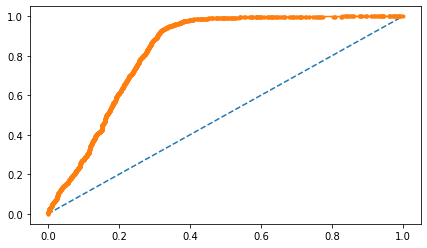

Logistic2_5-Test AUC: 0.83955


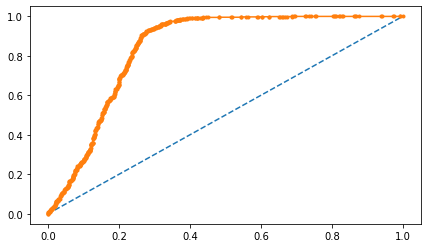

In [1153]:
# AUC and ROC for the model 5

# calculate AUC
auc = metrics.roc_auc_score(y_train,Logistic2_5.predict(X_train5))#keeping only the probabilities for the desired class outcome
print('Logistic2_5-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Logistic2_5.predict(X_train5))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(y_test,Logistic2_5.predict(X_test5))#keeping only the probabilities for the desired class outcome
print('Logistic2_5-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Logistic2_5.predict(X_test5))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Iteration 6 - dropping 'Overall_Score'

In [1154]:
formula2_6='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Injury_Propensity_Low+Injury_Propensity_Normal+School_Type_C+Region_Southern'

In [1155]:
Logistic2_6 = sm.logit(formula=formula2_6,data=Train).fit()

Optimization terminated successfully.
         Current function value: 0.429326
         Iterations 6


In [1156]:
result1 = Logistic2_6.summary()
result1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 4350
Model:                          Logit   Df Residuals:                     4341
Method:                           MLE   Df Model:                            8
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3381
Time:                        20:14:10   Log-Likelihood:                -1867.6
converged:                       True   LL-Null:                       -2821.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.7185      0.042     17.288      0.000       0.637       0.800
Academic_Score              -0.8362      0.056    -14.985      0.000      -0.946      -0.727
Score_on_Plays_Made         -0.9445      0.054    -17.387      0.000      -1.051      -0.838
Missed_Play_Score            0.1589      0.054      2.929      0.003       0.053       0.265
School_Score                -0.5272      0.047    -11.284      0.000      -0.619      -0.436
Injury_Propensity_Low       -0.3833      0.049     -7.886      0.000      -0.479      -0.288
Injury_Propensity_Normal    -0.1846      0.048     -3.870      0.000      -0.278      -0.091
School_Type_C               -0.2245      0.042     -5.285      0.000      -0.308      -0.141
Region_Southern              0.2290      0.043      5.375      0.000       0.146       0.313
============================================================================================
"""

In [1157]:
from sklearn import metrics

In [1158]:
X_train6=X_train5.drop('Overall_Score',axis=1)
X_test6=X_test5.drop('Overall_Score',axis=1)

In [1159]:
model_6_train_class = Logistic2_6.predict(X_train6)
model_6_test_class = Logistic2_6.predict(X_test6)

In [1160]:
model_6_train_class=(model_6_train_class>=0.5).astype(np.int)
model_6_train_class

4091    1
3592    1
6076    0
1146    1
5410    0
       ..
1853    1
4631    1
4301    1
3584    1
2619    1
Length: 4350, dtype: int32

In [1161]:
model_6_test_class=(model_6_test_class>=0.5).astype(np.int)
model_6_test_class

5305    0
1641    1
4157    1
4016    1
1582    1
       ..
1102    1
1986    0
1074    1
5844    0
1012    1
Length: 1865, dtype: int32

In [1162]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

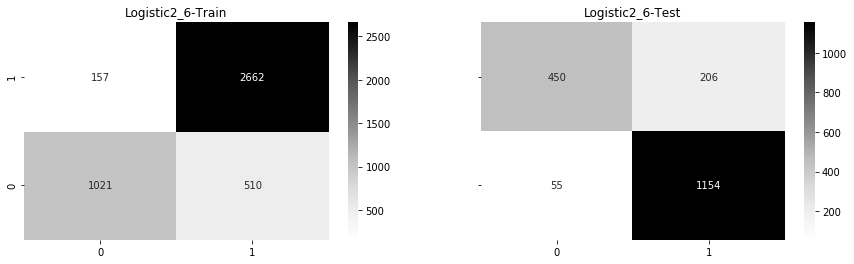

In [1163]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,model_6_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Logistic2_6-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,model_6_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Logistic2_6-Test');



In [1164]:
print('Logistic2_6-Train')
tn, fp, fn, tp = metrics.confusion_matrix(y_train,model_6_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Logistic2_6-Test')
tn, fp, fn, tp = metrics.confusion_matrix(y_test,model_6_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic2_6-Train
True Negative: 1021 
False Positives: 510 
False Negatives: 157 
True Positives: 2662 


Logistic2_6-Test
True Negative: 450 
False Positives: 206 
False Negatives: 55 
True Positives: 1154 




In [1165]:
print('Logistic2_6-Train')
print(metrics.classification_report(y_train,model_6_train_class),'\n')

print('Logistic2_6-Test')
print(metrics.classification_report(y_test,model_6_test_class),'\n')

Logistic2_6-Train
              precision    recall  f1-score   support

           0       0.87      0.67      0.75      1531
           1       0.84      0.94      0.89      2819

    accuracy                           0.85      4350
   macro avg       0.85      0.81      0.82      4350
weighted avg       0.85      0.85      0.84      4350
 

Logistic2_6-Test
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       656
           1       0.85      0.95      0.90      1209

    accuracy                           0.86      1865
   macro avg       0.87      0.82      0.84      1865
weighted avg       0.86      0.86      0.86      1865
 



In [1166]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

Logistic2_6-Train AUC: 0.82587


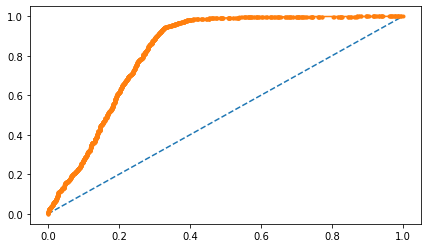

Logistic2_6-Test AUC: 0.84042


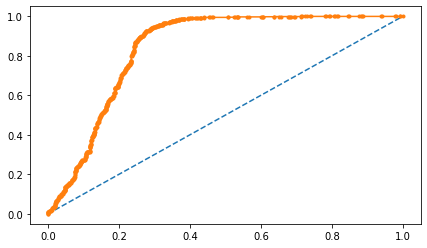

In [1167]:
# AUC and ROC for the model 6

# calculate AUC
auc = metrics.roc_auc_score(y_train,Logistic2_6.predict(X_train6))#keeping only the probabilities for the desired class outcome
print('Logistic2_6-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Logistic2_6.predict(X_train6))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(y_test,Logistic2_6.predict(X_test6))#keeping only the probabilities for the desired class outcome
print('Logistic2_6-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Logistic2_6.predict(X_test6))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# 2.4 Use the same training-test data split in Part (III) to develop a suitable Linear Discriminant Analysis (LDA) model. Use the same to on the test data. Compare the final output from the logistic regression model and LDA.

# LDA

In [1168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [1169]:
LDA = LinearDiscriminantAnalysis()

# Iteration 1 - all variables

In [1170]:
model_1_LDA = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']],Train['Scholarship'])

In [1171]:
print('Accuracy Score of Model 1:',model_1_LDA.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']],Train['Scholarship']))

Accuracy Score of Model 1: 0.8574712643678161


In [1172]:
model_1_LDA_train_class = model_1_LDA.predict(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
model_1__LDA_train_probabilities = model_1_LDA.predict_proba(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']])

In [1173]:
model_1_LDA_test_class = model_1_LDA.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
model_1__LDA_test_probabilities = model_1_LDA.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']])

In [1174]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

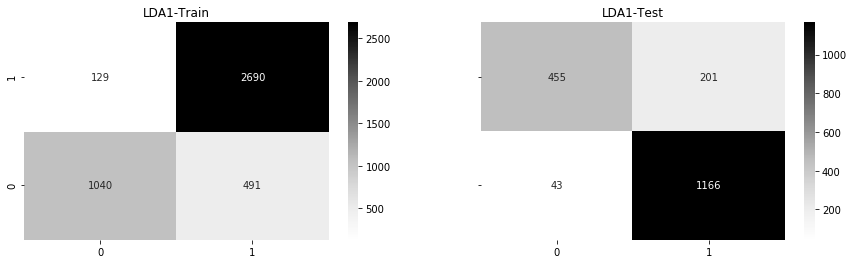

In [1175]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Train['Scholarship'],model_1_LDA_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA1-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_1_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA1-Test');

In [1176]:
print('LDA1-Train')
tn, fp, fn, tp = metrics.confusion_matrix(Train['Scholarship'],model_1_LDA_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('LDA1-Test')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_1_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

LDA1-Train
True Negative: 1040 
False Positives: 491 
False Negatives: 129 
True Positives: 2690 


LDA1-Test
True Negative: 455 
False Positives: 201 
False Negatives: 43 
True Positives: 1166 




In [1177]:
print('LDA1-Train')
print(metrics.classification_report(Train['Scholarship'],model_1_LDA_train_class),'\n')

print('LDA1-Test')
print(metrics.classification_report(Test['Scholarship'],model_1_LDA_test_class),'\n')

LDA1-Train
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1531
           1       0.85      0.95      0.90      2819

    accuracy                           0.86      4350
   macro avg       0.87      0.82      0.83      4350
weighted avg       0.86      0.86      0.85      4350
 

LDA1-Test
              precision    recall  f1-score   support

           0       0.91      0.69      0.79       656
           1       0.85      0.96      0.91      1209

    accuracy                           0.87      1865
   macro avg       0.88      0.83      0.85      1865
weighted avg       0.87      0.87      0.86      1865
 



In [1178]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

LDA1-Train AUC: 0.82738


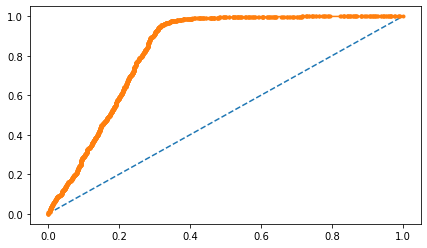

LDA1-Test AUC: 0.84648


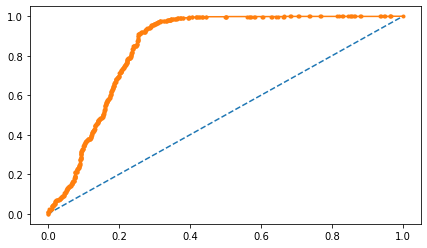

In [1179]:
# AUC and ROC for the model 1

# calculate AUC
auc = metrics.roc_auc_score(Train['Scholarship'],model_1__LDA_train_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA1-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Train['Scholarship'],model_1__LDA_train_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_1__LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA1-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_1__LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [1180]:
from matplotlib import pyplot as plt
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [1181]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

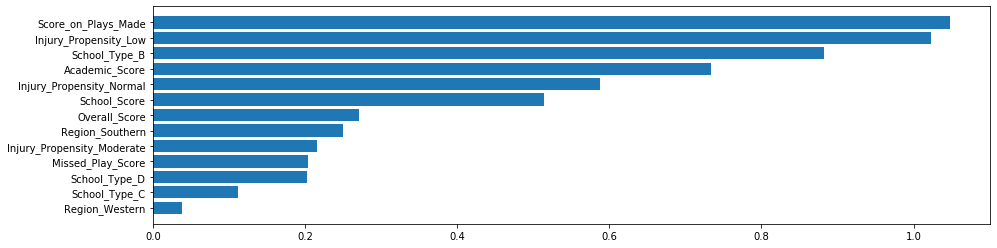

In [1182]:
importance = model_1_LDA.coef_
features_names = Test.columns
f_importances(abs(importance[0]), features_names)

# Iteration 2 - dropping 'Region_Western'

In [1183]:
model_2_LDA = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern']],Train['Scholarship'])

In [1184]:
print('Accuracy Score of Model 2:',model_2_LDA.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern']],Train['Scholarship']))

Accuracy Score of Model 2: 0.8572413793103448


In [1185]:
model_2_LDA_train_class = model_2_LDA.predict(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern']])
model_2__LDA_train_probabilities = model_2_LDA.predict_proba(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern']])

In [1186]:
model_2_LDA_test_class = model_2_LDA.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern']])
model_2__LDA_test_probabilities = model_2_LDA.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern']])

In [1187]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

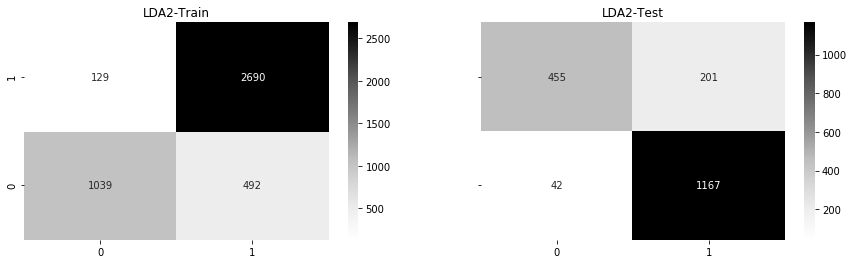

In [1188]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Train['Scholarship'],model_2_LDA_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA2-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_2_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA2-Test');

In [1189]:
print('LDA2-Train')
tn, fp, fn, tp = metrics.confusion_matrix(Train['Scholarship'],model_2_LDA_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('LDA2-Test')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_2_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

LDA2-Train
True Negative: 1039 
False Positives: 492 
False Negatives: 129 
True Positives: 2690 


LDA2-Test
True Negative: 455 
False Positives: 201 
False Negatives: 42 
True Positives: 1167 




In [1190]:
print('LDA2-Train')
print(metrics.classification_report(Train['Scholarship'],model_2_LDA_train_class),'\n')

print('LDA2-Test')
print(metrics.classification_report(Test['Scholarship'],model_2_LDA_test_class),'\n')

LDA2-Train
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1531
           1       0.85      0.95      0.90      2819

    accuracy                           0.86      4350
   macro avg       0.87      0.82      0.83      4350
weighted avg       0.86      0.86      0.85      4350
 

LDA2-Test
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       656
           1       0.85      0.97      0.91      1209

    accuracy                           0.87      1865
   macro avg       0.88      0.83      0.85      1865
weighted avg       0.88      0.87      0.86      1865
 



In [1191]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

LDA2-Train AUC: 0.82751


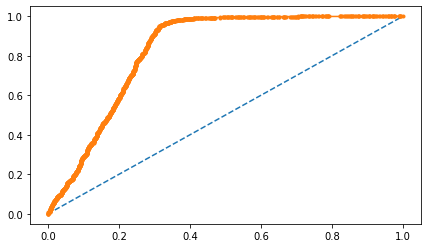

LDA2-Test AUC: 0.84643


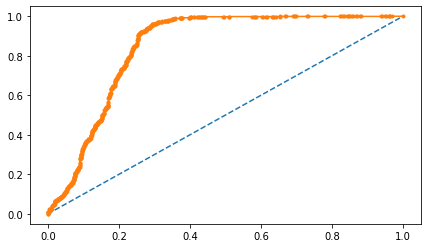

In [1192]:
# AUC and ROC for the model 2

# calculate AUC
auc = metrics.roc_auc_score(Train['Scholarship'],model_2__LDA_train_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA2-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Train['Scholarship'],model_2__LDA_train_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_2__LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA2-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_2__LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [1193]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

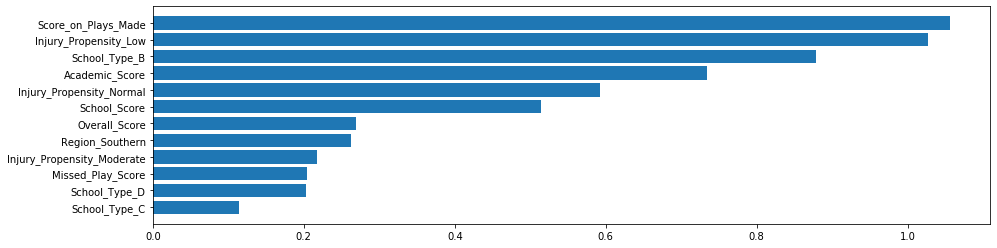

In [1194]:
importance = model_2_LDA.coef_
features_names = ['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern']
f_importances(abs(importance[0]), features_names)

# Iteration 3 - dropping 'School_Type_C'

In [1195]:
model_3_LDA = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_D','Region_Southern']],Train['Scholarship'])

In [1196]:
print('Accuracy Score of Model 3:',model_3_LDA.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_D','Region_Southern']],Train['Scholarship']))

Accuracy Score of Model 3: 0.8572413793103448


In [1197]:
model_3_LDA_train_class = model_3_LDA.predict(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_D','Region_Southern']])
model_3__LDA_train_probabilities = model_3_LDA.predict_proba(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_D','Region_Southern']])

In [1198]:
model_3_LDA_test_class = model_3_LDA.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_D','Region_Southern']])
model_3__LDA_test_probabilities = model_3_LDA.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_D','Region_Southern']])

In [1199]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

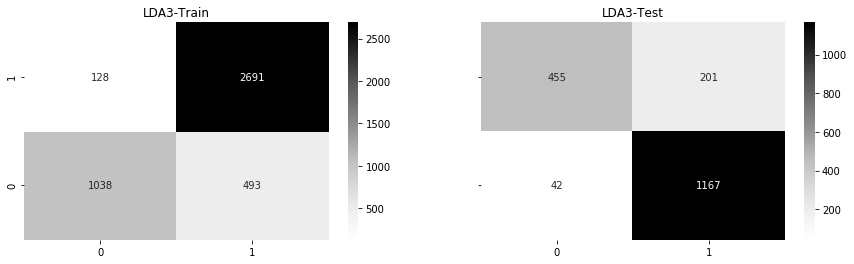

In [1200]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Train['Scholarship'],model_3_LDA_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA3-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_3_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA3-Test');

In [1201]:
print('LDA3-Train')
tn, fp, fn, tp = metrics.confusion_matrix(Train['Scholarship'],model_3_LDA_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('LDA3-Test')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_3_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

LDA3-Train
True Negative: 1038 
False Positives: 493 
False Negatives: 128 
True Positives: 2691 


LDA3-Test
True Negative: 455 
False Positives: 201 
False Negatives: 42 
True Positives: 1167 




In [1202]:
print('LDA3-Train')
print(metrics.classification_report(Train['Scholarship'],model_3_LDA_train_class),'\n')

print('LDA3-Test')
print(metrics.classification_report(Test['Scholarship'],model_3_LDA_test_class),'\n')

LDA3-Train
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1531
           1       0.85      0.95      0.90      2819

    accuracy                           0.86      4350
   macro avg       0.87      0.82      0.83      4350
weighted avg       0.86      0.86      0.85      4350
 

LDA3-Test
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       656
           1       0.85      0.97      0.91      1209

    accuracy                           0.87      1865
   macro avg       0.88      0.83      0.85      1865
weighted avg       0.88      0.87      0.86      1865
 



In [1203]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

LDA3-Train AUC: 0.82764


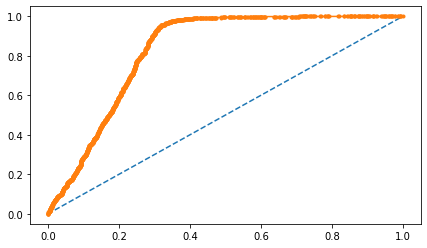

LDA3-Test AUC: 0.84625


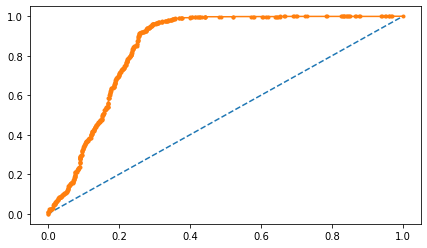

In [1204]:
# AUC and ROC for the model 3

# calculate AUC
auc = metrics.roc_auc_score(Train['Scholarship'],model_3__LDA_train_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA3-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Train['Scholarship'],model_3__LDA_train_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_3__LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA3-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_3__LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [1205]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

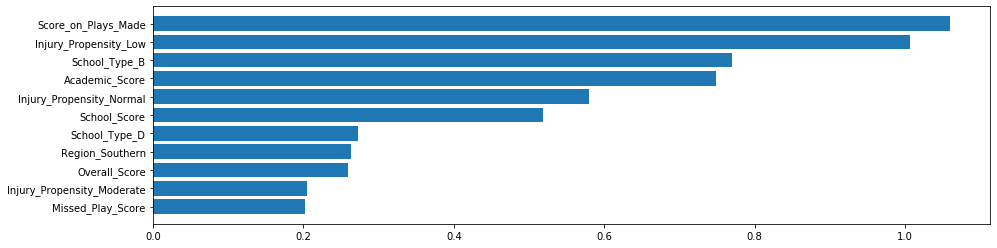

In [1206]:
importance = model_3_LDA.coef_
features_names = ['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_D','Region_Southern']
f_importances(abs(importance[0]), features_names)

# 2.5 Business Report documenting the results and stating the actionable insights and the recommendations.